# Overall Olympics Analysis

In [2]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read csv files
athletes=pd.read_csv('C:/Users/Vijay/Documents/Data analytics/Projects/Olympics Analysis/Datasets/athlete_events.csv')
regions=pd.read_csv('C:/Users/Vijay/Documents/Data analytics/Projects/Olympics Analysis/Datasets/noc_regions.csv')

In [4]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
#Join the dataframes
dataset=athletes.merge(regions, how='left', on='NOC')
dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
dataset.shape

(271116, 17)

In [8]:
#Column name consistent
dataset.rename(columns={'region':'Region', 'notes':'Notes'}, inplace=True)
dataset.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [10]:
dataset.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [11]:
column_nan=dataset.isna().any()
column_nan

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [12]:
dataset.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [13]:
dataset.query('Team=="India"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [14]:
dataset.query('Team=="China"').head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
1072,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
2611,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
2612,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [182]:
top10_more_number_of_teams=dataset.Team.value_counts().sort_values(ascending=False).head(10)
top10_more_number_of_teams

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

Text(0.5, 1.0, 'Top 10 in more number of teams ')

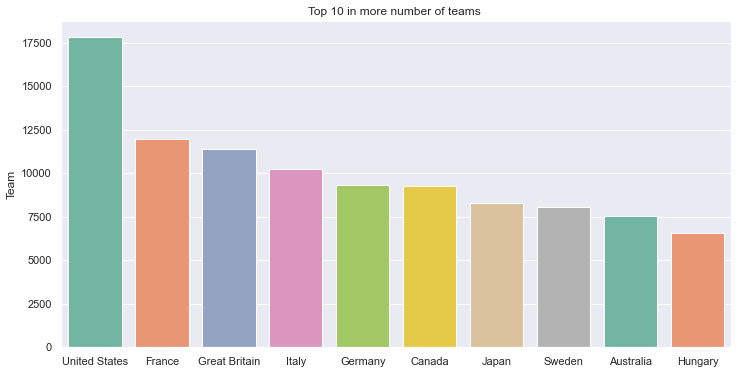

In [184]:
plt.figure(figsize=(12,6))
sns.barplot(x=top10_more_number_of_teams.index, y=top10_more_number_of_teams, palette='Set2')
plt.title('Top 10 in more number of teams ')

In [28]:
top100_countries=dataset.Team.value_counts().sort_values(ascending=False).head(100)
top100_countries

United States                   17847
France                          11988
Great Britain                   11404
Italy                           10260
Germany                          9326
                                ...  
Dominican Republic                277
Ecuador                           277
United States-1                   277
United States Virgin Islands      270
Angola                            267
Name: Team, Length: 100, dtype: int64

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <BarContainer object of 34 artists>)

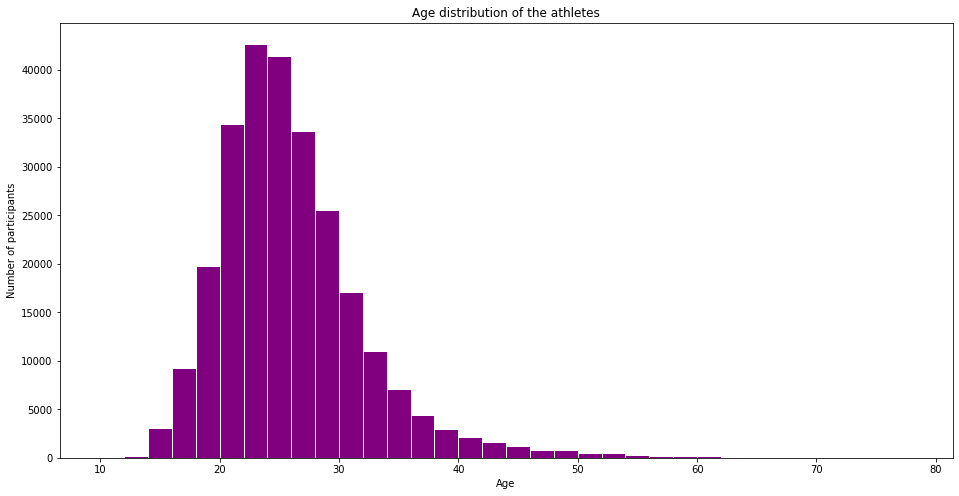

In [36]:
#Age distribution
plt.figure(figsize=(16, 8))
plt.title('Age distribution of the athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(dataset.Age, bins=np.arange(10,80,2), color='purple', edgecolor='white')

In [37]:
#Winter games
winter_sports=dataset[dataset.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [42]:
#Summer sports
summer_sports=dataset[dataset.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [43]:
#Gender count
gender_count=dataset.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x1deef7d86d0>,
 [Text(0.21002805908425465, -1.130658310188052, 'Male'),
  Text(-0.2100279532243837, 1.130658329852293, 'Female')],
 [Text(0.11871151165631783, -0.6390677405410727, '72.5%'),
  Text(-0.11871145182247773, 0.6390677516556437, '27.5%')])

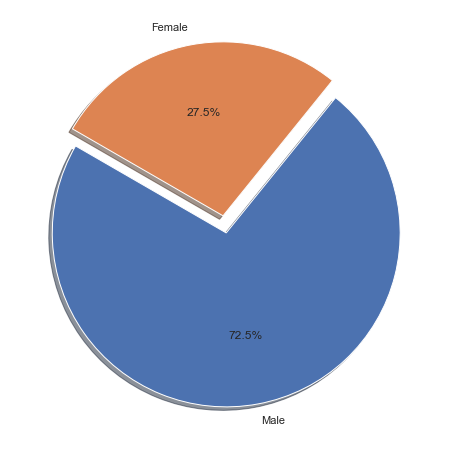

In [181]:
# Gender Pie plot
plt.figure(figsize=(16,8))
plt.pie(gender_count, labels=['Male', 'Female'], autopct='%1.1f%%', explode=[0.05]*2, startangle=150, shadow=True)

In [49]:
dataset.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [53]:
#India year chart
india_chart=dataset[dataset.Team=='India'][['Medal','Year']]
india_chart=india_chart.groupby('Year').count().reset_index()
india_chart

,Year,Medal
0,1900,2
1,1920,0
2,1924,7
3,1928,14
4,1932,15
5,1936,19
6,1948,20
7,1952,15
8,1956,17
9,1960,13


<AxesSubplot:title={'center':'India Medals'}, xlabel='Year', ylabel='Medal'>

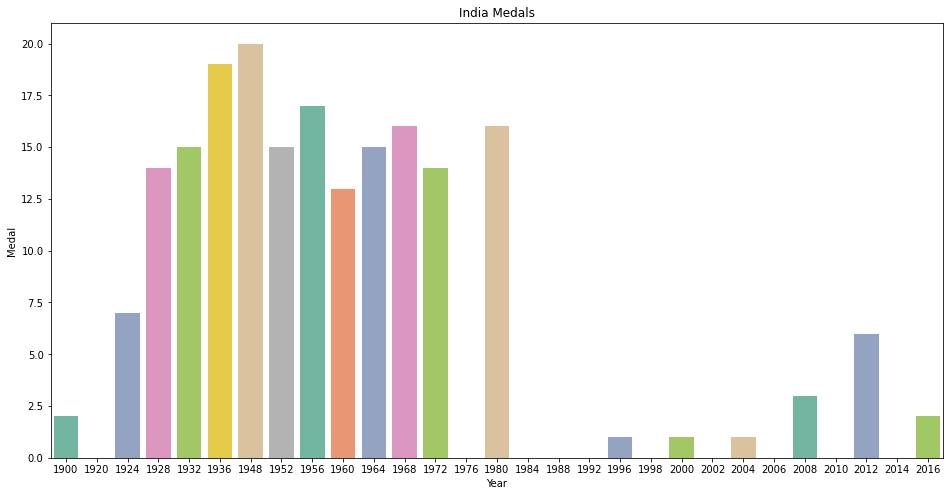

In [57]:
plt.figure(figsize=(16,8))
plt.title('India Medals')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
sns.barplot(x=india_chart.Year, y=india_chart.Medal, palette='Set2')

In [59]:
#Female participation
female_participation=dataset[(dataset.Sex=='F')][['Sex', 'Year']]
female_participation=female_participation.groupby('Year').count().reset_index()
female_participation.head(10)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,261
7,1928,437
8,1932,369
9,1936,549


In [61]:
womenathletes=dataset[dataset.Sex=='F']

<AxesSubplot:title={'center':'Women Participants'}, xlabel='Year', ylabel='count'>

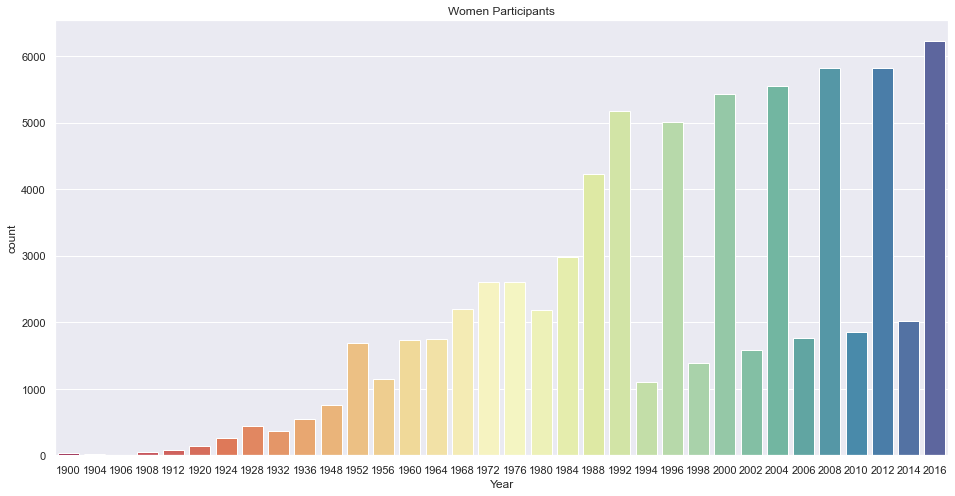

In [64]:
plt.figure(figsize=(16, 8))
plt.title('Women Participants')
sns.set(style='darkgrid')
sns.countplot(x='Year', data=womenathletes, palette='Spectral')

<AxesSubplot:xlabel='Year'>

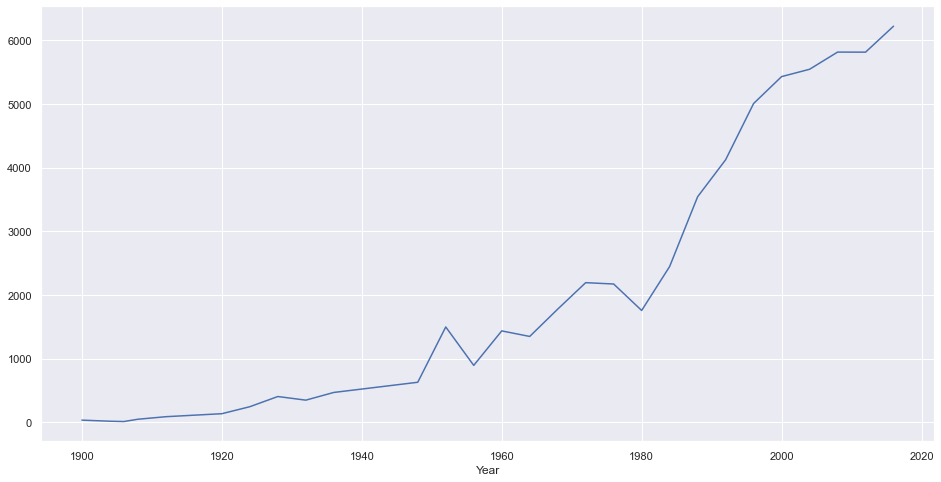

In [75]:
# Women graph mark # Summer
plt.figure(figsize=(16, 8))
womenathletes1=dataset[(dataset.Sex=='F') & (dataset.Season=='Summer')][['Year', 'Sex']]
graph=womenathletes1.groupby('Year')['Sex'].value_counts()
graph.loc[:,'F'].plot()

<AxesSubplot:xlabel='Year'>

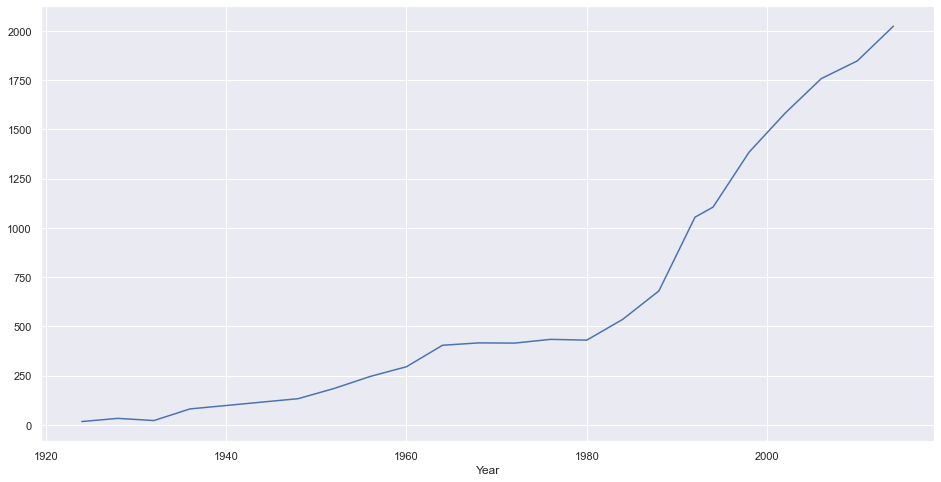

In [76]:
# Women graph mark #Winter
plt.figure(figsize=(16, 8))
womenathletes1=dataset[(dataset.Sex=='F') & (dataset.Season=='Winter')][['Year', 'Sex']]
graph=womenathletes1.groupby('Year')['Sex'].value_counts()
graph.loc[:,'F'].plot()

<AxesSubplot:xlabel='Year'>

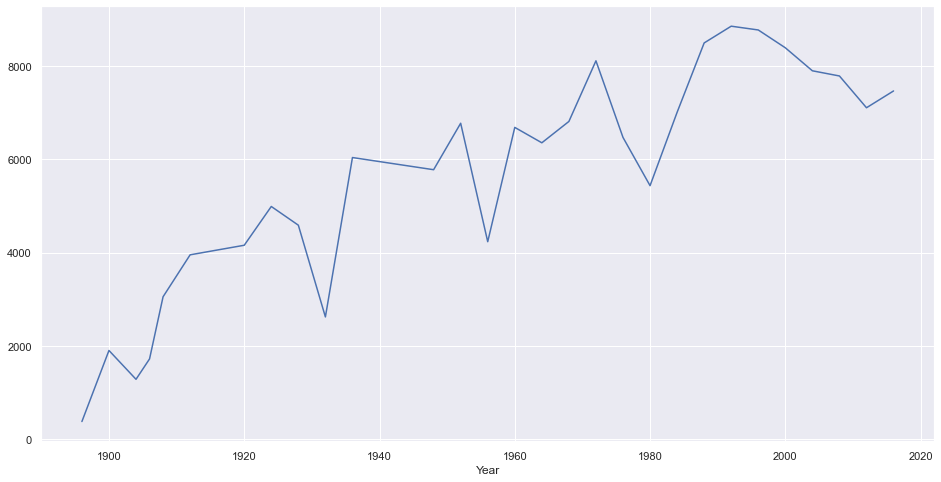

In [78]:
# Men graph mark #Summer
plt.figure(figsize=(16, 8))
womenathletes1=dataset[(dataset.Sex=='M') & (dataset.Season=='Summer')][['Year', 'Sex']]
graph=womenathletes1.groupby('Year')['Sex'].value_counts()
graph.loc[:,'M'].plot()

<AxesSubplot:xlabel='Year'>

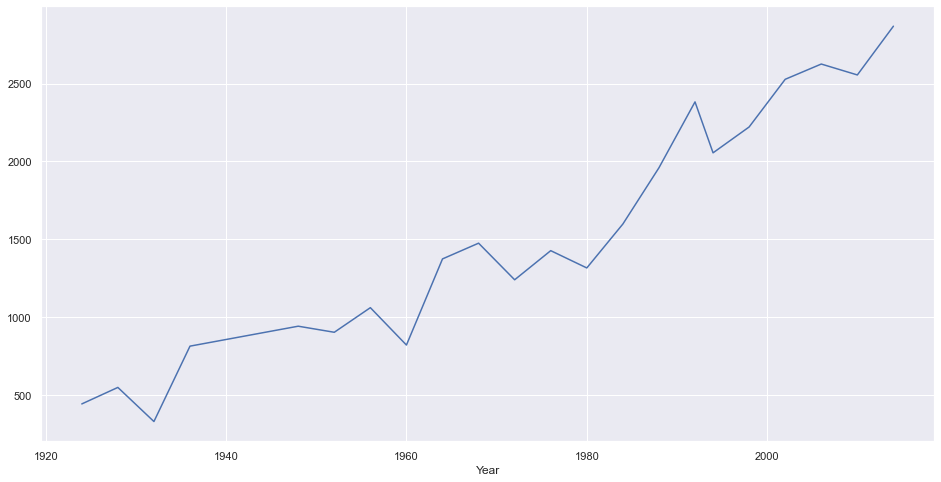

In [80]:
# Men graph mark #Winter
plt.figure(figsize=(16, 8))
womenathletes1=dataset[(dataset.Sex=='M') & (dataset.Season=='Winter')][['Year', 'Sex']]
graph=womenathletes1.groupby('Year')['Sex'].value_counts()
graph.loc[:,'M'].plot()

In [130]:
goldmedals=dataset[dataset.Medal=='Gold']
goldmedals.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [131]:
goldmedals=goldmedals[['Team','Medal']]
goldmedals=goldmedals.groupby('Team')['Medal'].value_counts().unique()
goldmedals

array([   5,    4,   12,   91,    2,    9,   20,  342,   95,    7,    1,
          3,   24,   94,  103,    6,    8,   54,  422,   16,  308,   28,
         14,   58,  164,   42,   81,  168,  369,   11,   13,   22,  198,
        455,  679,  519,   10,  432,  138,   18,  535,   38,  247,   34,
         17,   30,  277,   85,   23,  299,  117,  161,  366,   15,   32,
        211, 1058,  108,  451,  144,   40,   47,  123, 2474,   31,  155,
        130], dtype=int64)

In [155]:
#Gold winning team 
goldmedalist=dataset[(dataset['Medal']=='Gold')].Team
goldmedalist.value_counts()

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
                 ... 
Israel              1
Carabinier-15       1
Mozambique          1
Belgium-1           1
Satchmo             1
Name: Team, Length: 242, dtype: int64

Text(0.5, 1.0, 'Top 20 Gold Winners country till  2016')

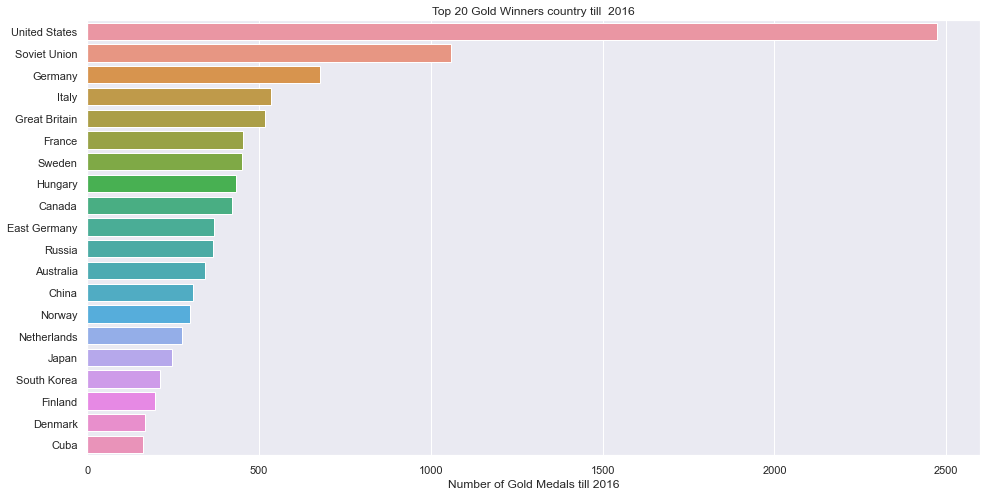

In [173]:
plt.figure(figsize=(16, 8))
sns.barplot(x=goldmedalist.value_counts().head(20), y=goldmedalist.value_counts().head(20).index)
plt.xlabel('Number of Gold Medals till 2016')
plt.title('Top 20 Gold Winners country till  2016')

In [162]:
#Silver Winning team
silvermedalist=dataset[dataset['Medal']=='Silver'].Team
silvermedalist.value_counts()

United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
                 ... 
Israel              1
Bahrain             1
Cyprus              1
Rostock             1
Tonga               1
Name: Team, Length: 273, dtype: int64

Text(0.5, 0, 'Number of Silver Medals till 2016')

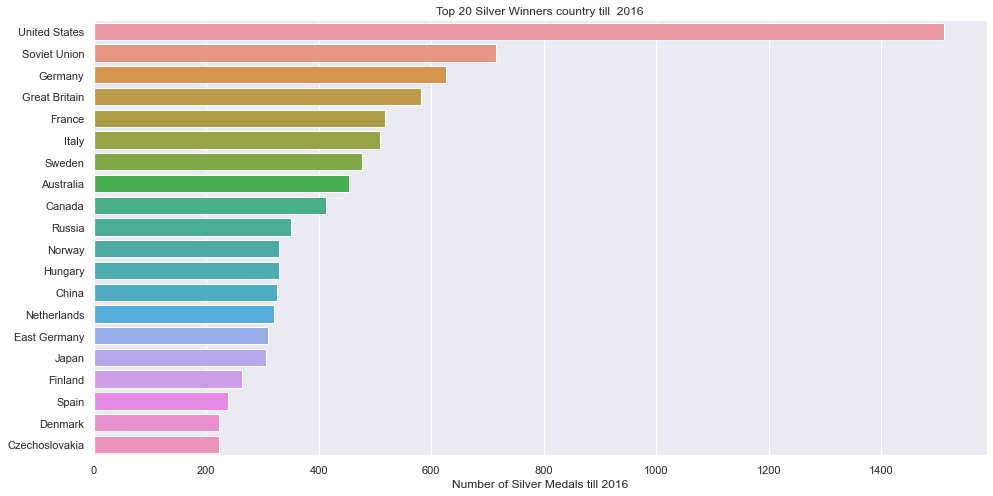

In [174]:
plt.figure(figsize=(16, 8))
sns.barplot(x=silvermedalist.value_counts().head(20), y=silvermedalist.value_counts().head(20).index)
plt.title('Top 20 Silver Winners country till  2016')
plt.xlabel('Number of Silver Medals till 2016')

In [170]:
#Bronze Winning team
bronzemedalist=dataset[dataset['Medal']=='Bronze'].Team
bronzemedalist.value_counts()

United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
                 ... 
Zambia              1
Macedonia           1
Cameroon            1
Suriname            1
Digby               1
Name: Team, Length: 268, dtype: int64

Text(0.5, 0, 'Number of Bronze Medals till 2016')

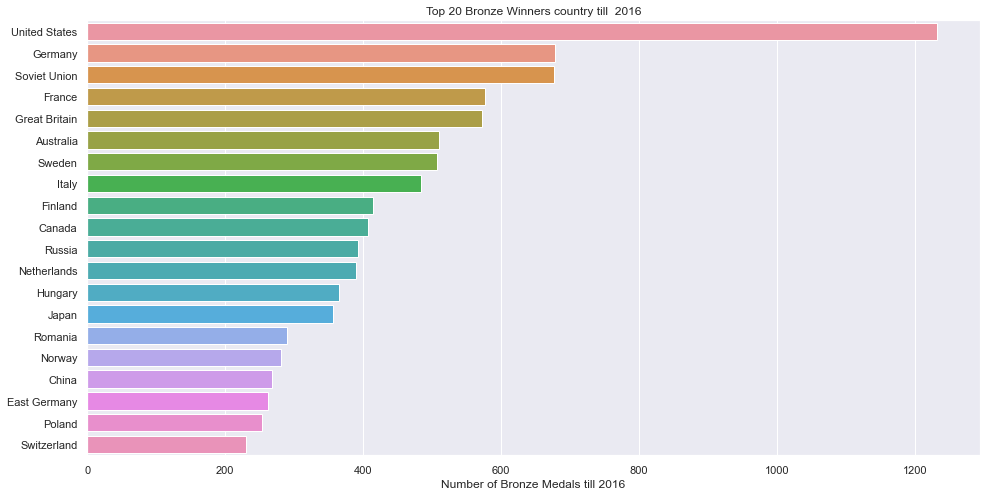

In [175]:
plt.figure(figsize=(16, 8))
sns.barplot(x=bronzemedalist.value_counts().head(20), y=bronzemedalist.value_counts().head(20).index)
plt.title('Top 20 Bronze Winners country till  2016')
plt.xlabel('Number of Bronze Medals till 2016')

In [132]:
notnullmedalist=dataset[(dataset['Height'].notnull()) & (dataset['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of the medalist')

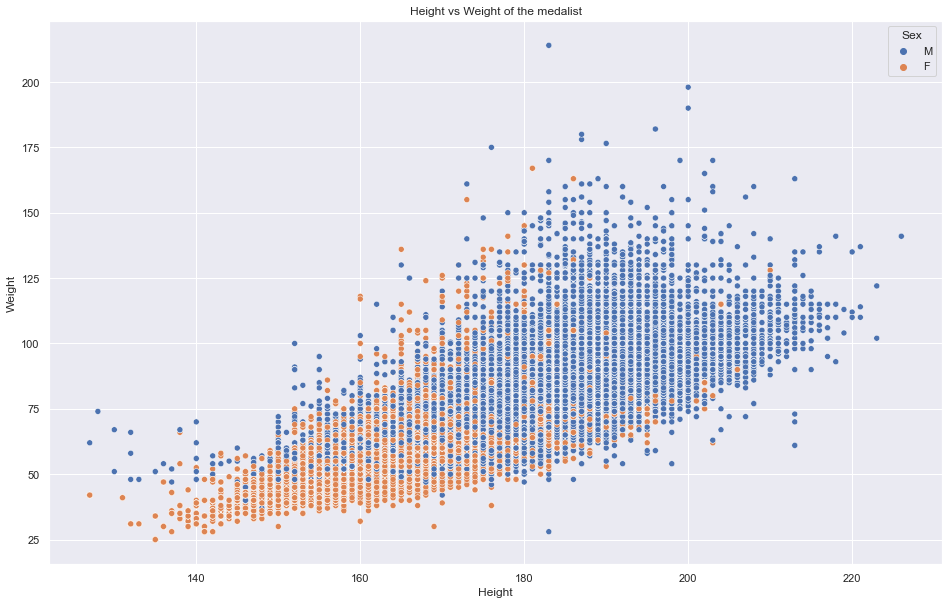

In [138]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='Height', y='Weight', data=notnullmedalist, hue='Sex')
plt.title('Height vs Weight of the medalist')